# Creating a Filter, Edge Detection

### Import resources and display image

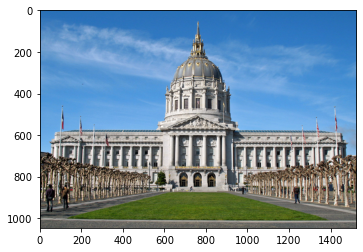

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
# image = mpimg.imread('images/curved_lane.jpg')
image = mpimg.imread('images/city_hall.jpg')
# image = mpimg.imread('images/stripes.jpg') #vertical stripes

plt.imshow(image)

### Convert the image to grayscale

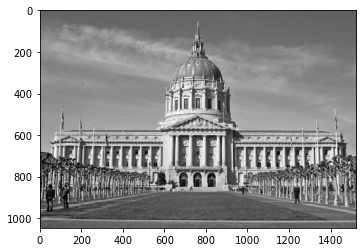

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

##### part(a): Image gradient along -y (Sobel_-y)

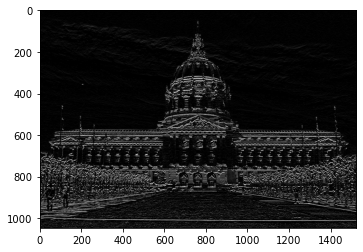

In [4]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')
# for vertical stripes image, gradient along y is zero ; so a dark image


##### part(b): Image gradient along x (Sobel_x)

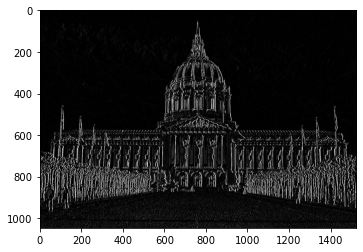

In [5]:
sobel_x = np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])

# sobel_x refers to gradient along x ; implies vertical edges
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')

##### part(c): Image gradient along -x (Sobel_-x)

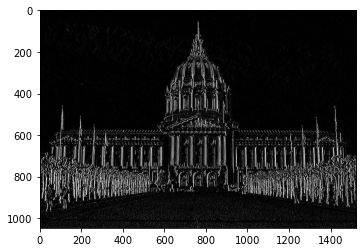

In [6]:
sobel_x = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
# sobel_x refers to gradient along x ; implies vertical edges

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')
# Note that the following is a gradient along -x which need not be same as gradient along x; clearly different here


##### part(d): Image gradient along -x with fractional filter weights (Sobel_-x fractional)

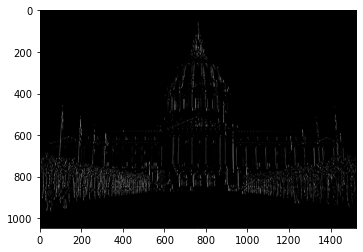

In [7]:
sobel_x = np.array([[0.5, 0, -0.5],
                  [1, 0, -2],
                  [0.5, 0, -0.5]])
# sobel_x refers to gradient along x ; implies vertical edges

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')
# Decimal weights makes the image have lower intensity edges; less prominent edges

##### part(e): Image gradient along -x with 3x5 filter size (Sobel_-x 3x5)

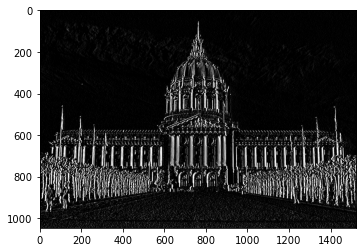

In [8]:
sobel_x = np.array([[1, 0, 0, 0, -1],
                    [2, 0, 0, 0, -2],
                    [1, 0, 0, 0, -1]])

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')
# The weights are the same, but a 5x5 filter
# This makes the edges stronger

##### part(f): Image gradient along -x with 3x5 filter size and higher filter weights (Sobel_-x 3x5 and higher weights)

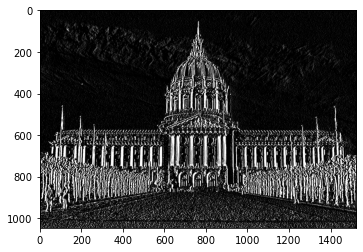

In [9]:
sobel_x = np.array([[2, 1, 0, -1, -2],
                    [2, 1, 0, -1, -2],
                    [4, 2, 0, -2, -4]])

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')
# Increasing weights of filter, naturally makes the edge bright and prominent

##### part(e): Image gradient along -x with 5x5 filter size (Sobel_-x 5x5)

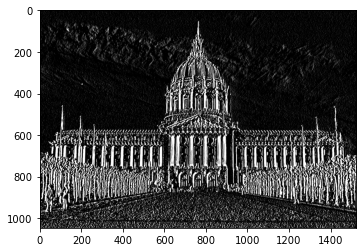

In [10]:
sobel_x = np.array([[2, 1, 0, -1, -2],
                    [2, 1, 0, -1, -2],
                    [4, 2, 0, -2, -4],
                    [2, 1, 0, -1, -2],
                    [2, 1, 0, -1, -2]])

filtered_image_x = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image_x, cmap = 'gray')


### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



###########################################################################################################

## Remarks/ My learning:

- `Types of edges` vs `gradient direction`
    - **vertical edge**   => direction in which one must travel to catch the edge (i.e. x) => **sobel x**
    - **horizontal edge** => direction in which one must travel to catch the edge (i.e. y) => **sobel y**
    - Remember vertical stripes image, no grad along y; horizontal edge no gradient along y
   
   
- `Filter-weights` vs `strength of edges` 
    - filter with greater weights -> pronounced edges
    - Edges with fractional weights (less magnitude) of weights -> less pronounced edges


- Important Note:
    - `sobel_x` and `sobel_-x` are **NOT** the same
        - except for a symmetric image along y axis
    - similar argument holds for sobel_y and sobel_-y